In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('husl')

In [133]:
df = pd.read_csv('data/processed.csv', index_col=0, dtype={'key': str, 'title': str, 'authors': str, 'abstract': str, 'year_published': int, 'tags': object})
df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')
df.head()

/var/folders/1y/6byzw1px62g2f5w7p_rhb6kh0000gn/T/ipykernel_39753/1523540997.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.tags = df.tags.str.strip("[]").str.replace(r"\s*|'", '').str.split(',')


,key,title,authors,abstract,year_published,tags
0,rayyan-354359269,An experience of automated assessment in a lar...,"Zampirolli F.A., Borovina Josko J.M., Venero M...",The 2020 pandemic imposed new demands on teach...,2021,"[approach:fully_automated, data:none, data_ava..."
1,rayyan-354359270,Semiautomatic generation and assessment of Jav...,"Insa D., Pérez S., Silva J., Tamarit S.",Continuous assessment is essential in educatio...,2021,"[approach:fully_automated, approach:semi_autom..."
2,rayyan-354359271,A tool for evaluating computer programs from s...,"Vaneck Q., Colart T., Frénay B., Vanderose B.",Computer science studies are more and more pop...,2021,"[approach:fully_automated, data:none, data_ava..."
3,rayyan-354359272,Virtual Teaching Assistant for Grading Program...,"Chou C.-Y., Chen Y.-J.",This study proposes an automated programming a...,2021,"[approach:semi_automatic, data:internal_assign..."
4,rayyan-354359273,Analysis of an automatic grading system within...,"Hegarty-Kelly E., Mooney D.A.",Reliable and pedagogically sound automated fee...,2021,"[approach:fully_automated, data:internal_assig..."


# Meta-Data
### Years Published

In [134]:
count_years = df.year_published.value_counts().reset_index().rename(columns={'index': 'year_published', 'year_published': 'no_published'})
count_years.head()

,year_published,no_published
0,2021,28
1,2020,28
2,2019,25
3,2018,21
4,2017,19


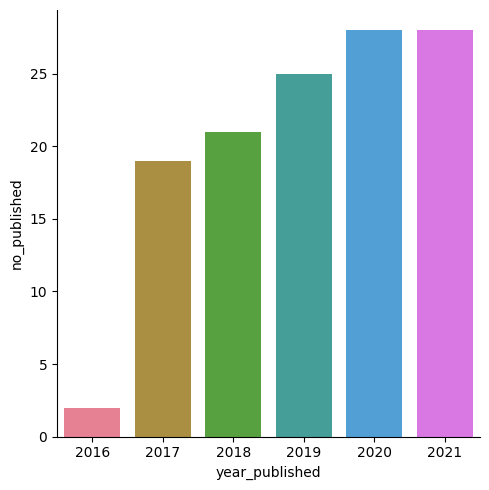

In [135]:
sns.catplot(count_years, kind='bar', x='year_published', y='no_published')
plt.savefig('plots/years_published.png')

## Paper Types

In [160]:
paper_types = pd.Series([tag[5:] for tags in df.tags for tag in tags if tag.startswith('type')]).value_counts().reset_index()
paper_types.columns = ["paper_type", 'no_type']
paper_types.head()

,paper_type,no_type
0,evaluation,99
1,description,93
2,experience_report,13
3,demo_paper,1


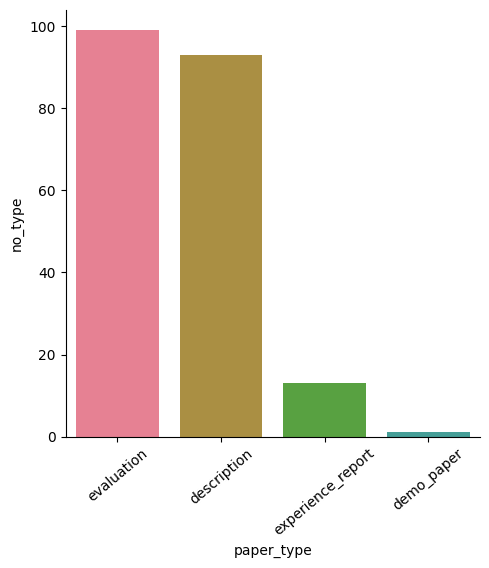

In [162]:
sns.catplot(paper_types, kind='bar', x='paper_type', y='no_type')
plt.xticks(rotation=40)
plt.savefig('plots/paper_types.png')